In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm, BoundaryNorm, LinearSegmentedColormap
import pandas as pd
import string
import xarray as xr

In [2]:
### Load data
parent_dir_n = '/pl/active/WRFLES_GAD/wfp_3dpbl/idealized/neutral/'
parent_dir_s = '/pl/active/WRFLES_GAD/wfp_3dpbl/idealized/stable/'
parent_dir_u = '/pl/active/WRFLES_GAD/wfp_3dpbl/idealized/unstable/'

## Neutral
# MYNN
dsn_m_n = xr.open_dataset(parent_dir_n+'dsn_m.nc')
dst_m_n = xr.open_dataset(parent_dir_n+'dst_m.nc')
dsz_m_n = xr.open_dataset(parent_dir_n+'dsz_m.nc')

# NCAR-HV
dsn_hv_n = xr.open_dataset(parent_dir_n+'dsn_hv.nc')
dst_hv_n = xr.open_dataset(parent_dir_n+'dst_hv.nc')
dsz_hv_n = xr.open_dataset(parent_dir_n+'dsz_hv.nc')

## Stable
# MYNN
dsn_m_s = xr.open_dataset(parent_dir_s+'dsn_m.nc')
dst_m_s = xr.open_dataset(parent_dir_s+'dst_m.nc')
dsz_m_s = xr.open_dataset(parent_dir_s+'dsz_m.nc')

# NCAR-HV
dsn_hv_s = xr.open_dataset(parent_dir_s+'dsn_hv.nc')
dst_hv_s = xr.open_dataset(parent_dir_s+'dst_hv.nc')
dsz_hv_s = xr.open_dataset(parent_dir_s+'dsz_hv.nc')

## Unstable
# MYNN
dsn_m_u = xr.open_dataset(parent_dir_u+'dsn_m.nc')
dst_m_u = xr.open_dataset(parent_dir_u+'dst_m.nc')
dsz_m_u = xr.open_dataset(parent_dir_u+'dsz_m.nc')

# NCAR-HV
dsn_hv_u = xr.open_dataset(parent_dir_u+'dsn_hv.nc')
dst_hv_u = xr.open_dataset(parent_dir_u+'dst_hv.nc')
dsz_hv_u = xr.open_dataset(parent_dir_u+'dsz_hv.nc')

In [3]:
### Pull key parameters out of WRF files
###   Assume matching coords
nlon_unstag = len(dsn_m_n['west_east'])
nlat_unstag = len(dsn_m_n['south_north'])
nlon_stag = nlon_unstag + 1
nlat_stag = nlat_unstag +1

iunstag_arr = np.arange(nlon_unstag)+1-111+1
junstag_arr = np.arange(nlat_unstag)+1-111+1

heights = dsn_m_n['HEIGHT'].values
heights_stag = dsn_m_n['HEIGHT_STAG'].values

In [4]:
### Read turbine data
turbine_file = '/projects/olry2348/WFIP2-WRF-3DPBL/runs/idealized/neutral/mynn-ztke/windturbines-ij.txt'
turbine_df = pd.read_csv(turbine_file, delim_whitespace=True, usecols=[0,1], names=['i', 'j'])

turbine_properties = '/projects/olry2348/WFIP2-WRF-3DPBL/runs/idealized/neutral/mynn-ztke/wind-turbine-1.tbl'
f = open(turbine_properties, "r")
lines = f.readlines()
hubheight = np.float(lines[1].split()[0])
rotor_diameter = np.float(lines[1].split()[1])
rotor_top = hubheight + rotor_diameter/2
rotor_bot = hubheight - rotor_diameter/2

print("Hub height", hubheight)
print("Rotor diameter", rotor_diameter)

Hub height 138.0
Rotor diameter 215.0


In [5]:
cols = ['Wspd', 'Thrust', 'Power']
property_df = np.zeros((len(lines[2:]), 3))
for i in range(len(property_df)):
    line = lines[2+i]
    property_df[i,0] = np.float(line.split()[0])
    property_df[i,1] = np.float(line.split()[1])
    property_df[i,2] = np.float(line.split()[2])
property_df = pd.DataFrame(property_df, columns=cols)
property_df = property_df.set_index('Wspd')

# NWF conditions
Examine conditions at the location inside the farm

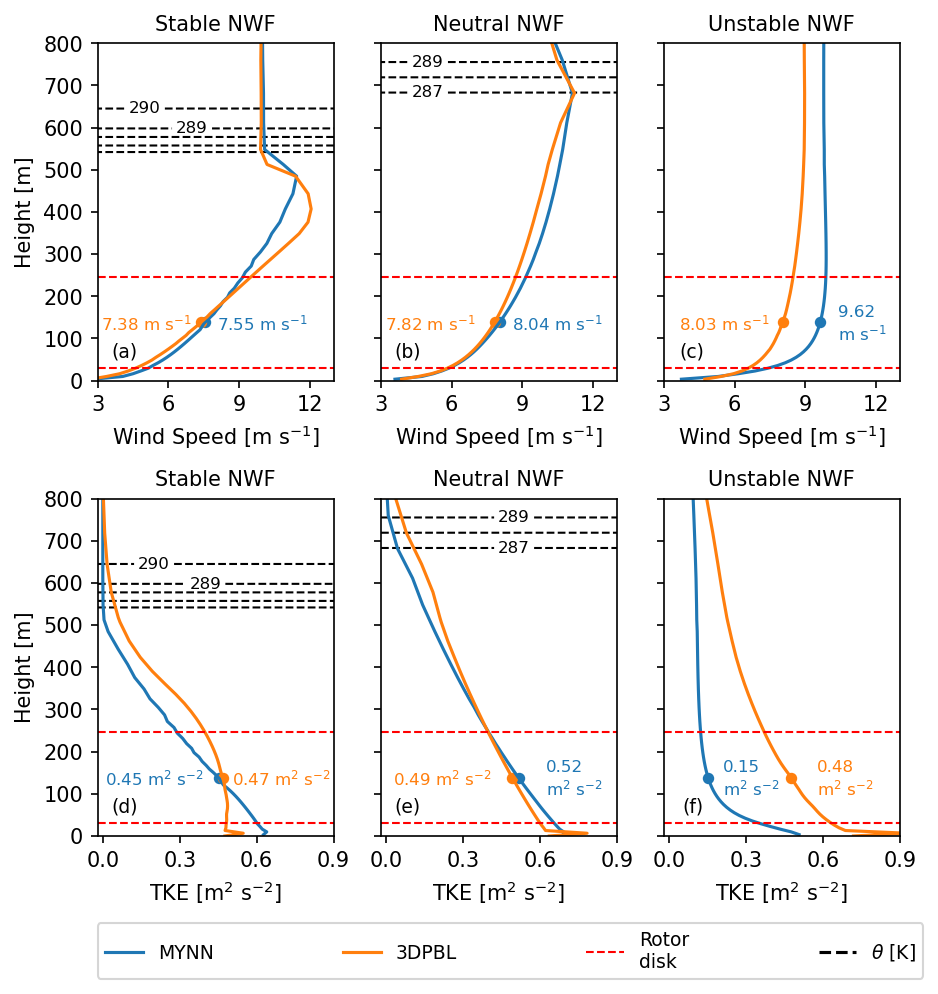

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(6.9,7), sharey=True, dpi=150)

## Wind speeds
wspd_nm_s = dsn_m_s['WSPD'].isel(south_north=slice(89,109), west_east=slice(89,109)).mean(('south_north', 'west_east'))
wspd_nhv_s = dsn_hv_s['WSPD'].isel(south_north=slice(89,109), west_east=slice(89,109)).mean(('south_north', 'west_east'))
wspd_nm_n = dsn_m_n['WSPD'].isel(south_north=slice(89,109), west_east=slice(89,109)).mean(('south_north', 'west_east'))
wspd_nhv_n = dsn_hv_n['WSPD'].isel(south_north=slice(89,109), west_east=slice(89,109)).mean(('south_north', 'west_east'))
wspd_nm_u = dsn_m_u['WSPD'].isel(south_north=slice(89,109), west_east=slice(89,109)).mean(('south_north', 'west_east'))
wspd_nhv_u = dsn_hv_u['WSPD'].isel(south_north=slice(89,109), west_east=slice(89,109)).mean(('south_north', 'west_east'))

wspd_hh_nm_s = np.interp(hubheight, heights, wspd_nm_s.values)
wspd_hh_nhv_s = np.interp(hubheight, heights, wspd_nhv_s.values)
wspd_hh_nm_n = np.interp(hubheight, heights, wspd_nm_n.values)
wspd_hh_nhv_n = np.interp(hubheight, heights, wspd_nhv_n.values)
wspd_hh_nm_u = np.interp(hubheight, heights, wspd_nm_u.values)
wspd_hh_nhv_u = np.interp(hubheight, heights, wspd_nhv_u.values)

## TKE
tke_nm_s = dsn_m_s['TKE'].isel(south_north=slice(89,109), west_east=slice(89,109)).mean(('south_north', 'west_east'))
tke_nhv_s = dsn_hv_s['TKE'].isel(south_north=slice(89,109), west_east=slice(89,109)).mean(('south_north', 'west_east'))
tke_nm_n = dsn_m_n['TKE'].isel(south_north=slice(89,109), west_east=slice(89,109)).mean(('south_north', 'west_east'))
tke_nhv_n = dsn_hv_n['TKE'].isel(south_north=slice(89,109), west_east=slice(89,109)).mean(('south_north', 'west_east'))
tke_nm_u = dsn_m_u['TKE'].isel(south_north=slice(89,109), west_east=slice(89,109)).mean(('south_north', 'west_east'))
tke_nhv_u = dsn_hv_u['TKE'].isel(south_north=slice(89,109), west_east=slice(89,109)).mean(('south_north', 'west_east'))

tke_hh_nm_s = np.interp(hubheight, heights, tke_nm_s.values)
tke_hh_nhv_s = np.interp(hubheight, heights_stag, tke_nhv_s.values)
tke_hh_nm_n = np.interp(hubheight, heights, tke_nm_n.values)
tke_hh_nhv_n = np.interp(hubheight, heights_stag, tke_nhv_n.values)
tke_hh_nm_u = np.interp(hubheight, heights, tke_nm_u.values)
tke_hh_nhv_u = np.interp(hubheight, heights_stag, tke_nhv_u.values)

## Plot
# Wind
ax[0,0].plot(wspd_nm_s, heights, label='MYNN')
ax[0,0].plot(wspd_nhv_s, heights, label='3DPBL')
ax[0,1].plot(wspd_nm_n, heights, label='MYNN')
ax[0,1].plot(wspd_nhv_n, heights, label='3DPBL')
ax[0,2].plot(wspd_nm_u, heights, label='MYNN')
ax[0,2].plot(wspd_nhv_u, heights, label='3DPBL')

ax[0,0].scatter(wspd_hh_nm_s, hubheight, color='C0', s=20)
ax[0,0].scatter(wspd_hh_nhv_s, hubheight, color='C1', s=20)
ax[0,1].scatter(wspd_hh_nm_n, hubheight, color='C0', s=20)
ax[0,1].scatter(wspd_hh_nhv_n, hubheight, color='C1', s=20)
ax[0,2].scatter(wspd_hh_nm_u, hubheight, color='C0', s=20)
ax[0,2].scatter(wspd_hh_nhv_u, hubheight, color='C1', s=20)

ax[0,0].text(0.89,
      0.15,
      np.round(wspd_hh_nm_s,2).astype(str)+' m s$^{-1}$',
      fontsize=8,
      transform = ax[0,0].transAxes,
      horizontalalignment='right',
        color='C0')
ax[0,0].text(0.40,
      0.15,
      np.round(wspd_hh_nhv_s,2).astype(str)+' m s$^{-1}$',
      fontsize=8,
      transform = ax[0,0].transAxes,
      horizontalalignment='right',
        color='C1')
ax[0,1].text(0.94,
      0.15,
      np.round(wspd_hh_nm_n,2).astype(str)+' m s$^{-1}$',
      fontsize=8,
      transform = ax[0,1].transAxes,
      horizontalalignment='right',
        color='C0')
ax[0,1].text(0.40,
      0.15,
      np.round(wspd_hh_nhv_n,2).astype(str)+' m s$^{-1}$',
      fontsize=8,
      transform = ax[0,1].transAxes,
      horizontalalignment='right',
        color='C1')
ax[0,2].text(0.74,
      0.12,
      np.round(wspd_hh_nm_u,2).astype(str)+'\nm s$^{-1}$',
      fontsize=8,
      transform = ax[0,2].transAxes,
      horizontalalignment='left',
        color='C0')
ax[0,2].text(0.45,
      0.15,
      np.round(wspd_hh_nhv_u,2).astype(str)+' m s$^{-1}$',
      fontsize=8,
      transform = ax[0,2].transAxes,
      horizontalalignment='right',
        color='C1')

# TKE
ax[1,0].plot(tke_nm_s, heights, label='MYNN')
ax[1,0].plot(tke_nhv_s, heights_stag, label='3DPBL')
ax[1,1].plot(tke_nm_n, heights, label='MYNN')
ax[1,1].plot(tke_nhv_n, heights_stag, label='3DPBL')
ax[1,2].plot(tke_nm_u, heights, label='MYNN')
ax[1,2].plot(tke_nhv_u, heights_stag, label='3DPBL')
   
ax[1,0].scatter(tke_hh_nm_s, hubheight, color='C0', s=20)
ax[1,0].scatter(tke_hh_nhv_s, hubheight, color='C1', s=20)
ax[1,1].scatter(tke_hh_nm_n, hubheight, color='C0', s=20)
ax[1,1].scatter(tke_hh_nhv_n, hubheight, color='C1', s=20)
ax[1,2].scatter(tke_hh_nm_u, hubheight, color='C0', s=20)
ax[1,2].scatter(tke_hh_nhv_u, hubheight, color='C1', s=20)

ax[1,0].text(0.45,
      0.15,
      np.round(tke_hh_nm_s,2).astype(str)+' m$^2$ s$^{-2}$',
      fontsize=8,
      transform = ax[1,0].transAxes,
      horizontalalignment='right',
        color='C0')
ax[1,0].text(0.99,
      0.15,
      np.round(tke_hh_nhv_s,2).astype(str)+' m$^2$ s$^{-2}$',
      fontsize=8,
      transform = ax[1,0].transAxes,
      horizontalalignment='right',
        color='C1')
ax[1,1].text(0.70,
      0.12,
      np.round(tke_hh_nm_n,2).astype(str)+'\nm$^2$ s$^{-2}$',
      fontsize=8,
      transform = ax[1,1].transAxes,
      horizontalalignment='left',
        color='C0')
ax[1,1].text(0.47,
      0.15,
      np.round(tke_hh_nhv_n,2).astype(str)+' m$^2$ s$^{-2}$',
      fontsize=8,
      transform = ax[1,1].transAxes,
      horizontalalignment='right',
        color='C1')
ax[1,2].text(0.25,
      0.12,
      np.round(tke_hh_nm_u,2).astype(str)+'\nm$^2$ s$^{-2}$',
      fontsize=8,
      transform = ax[1,2].transAxes,
      horizontalalignment='left',
        color='C0')
ax[1,2].text(0.65,
      0.12,
      np.round(tke_hh_nhv_u,2).astype(str)+'\nm$^2$ s$^{-2}$',
      fontsize=8,
      transform = ax[1,2].transAxes,
      horizontalalignment='left',
        color='C1')
    
## Turbines
for axs in ax.flatten():
    axs.axhline(rotor_top, color='r', lw=1, ls='--', label='Rotor\ndisk')
    axs.axhline(rotor_bot, color='r', lw=1, ls='--')

## Formatting
ax[0,0].set_ylim(0, 800)
for i in range(3):
    ax[0,i].set_xlim(3, 13)
    ax[0,i].set_xticks([3, 6, 9, 12])
    ax[0,i].set_xlabel("Wind Speed [m s$^{-1}$]", fontsize=10)
    
    ax[1,i].set_xlim(-0.02, 0.9)
    ax[1,i].set_xticks([0, 0.3, 0.6, 0.9])
    ax[1,i].set_xlabel("TKE [m$^2$ s$^{-2}$]", fontsize=10)

ax[0,0].set_ylabel("Height [m]", fontsize=10)
ax[1,0].set_ylabel("Height [m]", fontsize=10)
ax[0,0].set_title("Stable NWF", fontsize=10)
ax[0,1].set_title("Neutral NWF", fontsize=10)
ax[0,2].set_title("Unstable NWF", fontsize=10)
ax[1,0].set_title("Stable NWF", fontsize=10)
ax[1,1].set_title("Neutral NWF", fontsize=10)
ax[1,2].set_title("Unstable NWF", fontsize=10)

plt.subplots_adjust(hspace=0.35)

## Subpanel labels
for axs, letter in zip(ax.flatten(), ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']):
    axs.text(0.17,
          0.07,
          letter,
          fontsize=9,
          transform = axs.transAxes,
          horizontalalignment='right',
            color='black')

## Temperature contours
# Stable
ticks_t_s = np.arange(286, 293, 1)
t_nm_s = dsn_m_s['T'].mean('south_north')
t_nhv_s = dsn_hv_s['T'].mean('south_north')
ax[1,0].plot([-9999, -9999], [0, 1], ls='--', color='k', label='$\\theta$ [K]') ## Hacky approach for legend

CS = ax[0,0].contour(iunstag_arr,
                   heights,
                   t_nm_s,
                   ticks_t_s,
                   colors='k',
                   linestyles='dashed',
                   linewidths=1)
manual_locations = [(7.0, 600), (5.0, 750)]
ax[0,0].clabel(CS, inline=True, manual=manual_locations, fmt='%3.0f', fontsize=8)
CS = ax[1,0].contour(iunstag_arr,
                   heights,
                   t_nm_s,
                   ticks_t_s,
                   colors='k',
                   linestyles='dashed',
                   linewidths=1)
manual_locations = [(0.4, 600), (0.2, 750)]
ax[1,0].clabel(CS, inline=True, manual=manual_locations, fmt='%3.0f', fontsize=8)

# Neutral
ticks_t_n = np.arange(286, 290, 1)
t_nm_n = dsn_m_n['T'].mean('south_north')
t_nhv_n = dsn_hv_n['T'].mean('south_north')

CS = ax[0,1].contour(iunstag_arr,
                   heights,
                   t_nm_n,
                   ticks_t_n,
                   colors='k',
                   linestyles='dashed',
                   linewidths=1)
manual_locations = [(5.0, 650), (5.0, 750)]
ax[0,1].clabel(CS, inline=True, manual=manual_locations, fmt='%3.0f', fontsize=8)
CS = ax[1,1].contour(iunstag_arr,
                   heights,
                   t_nm_n,
                   ticks_t_n,
                   colors='k',
                   linestyles='dashed',
                   linewidths=1)
manual_locations = [(0.5, 650), (0.5, 750)]
ax[1,1].clabel(CS, inline=True, manual=manual_locations, fmt='%3.0f', fontsize=8)

handles, labels = ax[1,0].get_legend_handles_labels()
lgd = ax[1,0].legend(handles, labels, bbox_to_anchor=(0, -0.36, 3.5, .102), loc='upper left', fontsize=9, ncol=4, mode='expand',borderaxespad=0.)

# plt.savefig(f'../figs/all_nwf.pdf', bbox_inches='tight')

    
plt.show()

In [7]:
print("Wind Speed Differences")
print(f"\tWind Speed, Stable, MYNN is {np.round(wspd_hh_nm_s-wspd_hh_nhv_s,2)} m/s {np.round((wspd_hh_nm_s-wspd_hh_nhv_s)/wspd_hh_nm_s*100,2)}% stronger than the 3DPBL")
print(f"\tWind Speed, Neutral, MYNN is {np.round(wspd_hh_nm_n-wspd_hh_nhv_n,2)} m/s {np.round((wspd_hh_nm_n-wspd_hh_nhv_n)/wspd_hh_nm_n*100,2)}% stronger than the 3DPBL")
print(f"\tWind Speed, Unstable, MYNN is {np.round(wspd_hh_nm_u-wspd_hh_nhv_u,2)} m/s {np.round((wspd_hh_nm_u-wspd_hh_nhv_u)/wspd_hh_nm_u*100,2)}% stronger than the 3DPBL")

print("TKE Speed Differences")
print(f"\tWind Speed, Stable, MYNN is {np.round(tke_hh_nm_s-tke_hh_nhv_s,2)} m/s {np.round((tke_hh_nm_s-tke_hh_nhv_s)/tke_hh_nm_s*100,2)}% stronger than the 3DPBL")
print(f"\tWind Speed, Neutral, MYNN is {np.round(tke_hh_nm_n-tke_hh_nhv_n,2)} m/s {np.round((tke_hh_nm_n-tke_hh_nhv_n)/tke_hh_nm_n*100,2)}% stronger than the 3DPBL")
print(f"\tWind Speed, Unstable, MYNN is {np.round(tke_hh_nm_u-tke_hh_nhv_u,2)} m/s {np.round((tke_hh_nm_u-tke_hh_nhv_u)/tke_hh_nm_u*100,2)}% stronger than the 3DPBL")

Wind Speed Differences
	Wind Speed, Stable, MYNN is 0.17 m/s 2.23% stronger than the 3DPBL
	Wind Speed, Neutral, MYNN is 0.21 m/s 2.66% stronger than the 3DPBL
	Wind Speed, Unstable, MYNN is 1.59 m/s 16.54% stronger than the 3DPBL
TKE Speed Differences
	Wind Speed, Stable, MYNN is -0.02 m/s -3.48% stronger than the 3DPBL
	Wind Speed, Neutral, MYNN is 0.02 m/s 4.64% stronger than the 3DPBL
	Wind Speed, Unstable, MYNN is -0.32 m/s -212.36% stronger than the 3DPBL


# Wind speed comparison

### Top-down view

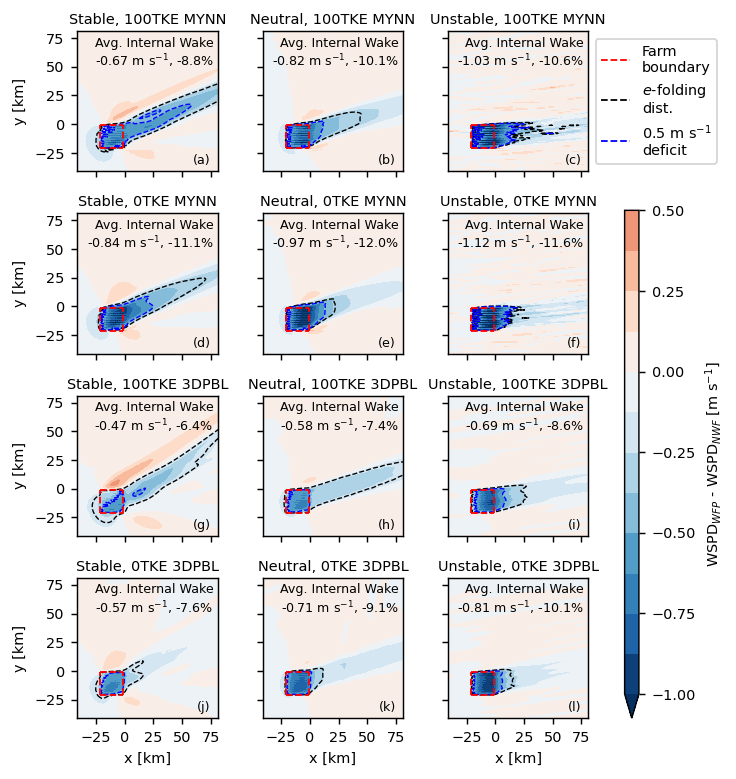

In [8]:
fig, ax = plt.subplots(4, 3, figsize=(5.5, 7), sharex=True, sharey=True, dpi=130)

for axs in ax.reshape(-1):
    axs.set_box_aspect(1)
    axs.tick_params(labelsize=8)

    axs.set_xticks([-25, 0, 25, 50, 75])
    axs.set_yticks([-25, 0, 25, 50, 75])
    
    axs.plot([-21, -21], [-21, -1], ls='--', color='r', lw=1, label='Farm\nboundary')
    axs.plot([-1, -1], [-21, -1], ls='--', color='r', lw=1)
    axs.plot([-21, -1], [-21, -21], ls='--', color='r', lw=1)
    axs.plot([-21, -1], [-1, -1], ls='--', color='r', lw=1)
    
ax[0,0].set_xlim(-41,81)
ax[0,0].set_ylim(-41,81)
    
## Plot parameters
# ticks_right = np.arange(-1.625, 0.625, 0.125)
ticks_right = np.arange(-1.0, 0.625, 0.125)
k_ind = 21

## Select simulation case
for pbl, tke, i in zip(['MYNN', 'MYNN', '3DPBL', '3DPBL'], ['100TKE', '0TKE', '100TKE', '0TKE'], range(4)):

    if pbl == 'MYNN':
        if tke == '100TKE':
            dsn_s = dsn_m_s
            dst_s = dst_m_s
            dsn_n = dsn_m_n
            dst_n = dst_m_n
            dsn_u = dsn_m_u
            dst_u = dst_m_u
        elif tke == '0TKE':
            dsn_s = dsn_m_s
            dst_s = dsz_m_s
            dsn_n = dsn_m_n
            dst_n = dsz_m_n
            dsn_u = dsn_m_u
            dst_u = dsz_m_u
    elif pbl == '3DPBL':
        if tke == '100TKE':
            dsn_s = dsn_hv_s
            dst_s = dst_hv_s
            dsn_n = dsn_hv_n
            dst_n = dst_hv_n
            dsn_u = dsn_hv_u
            dst_u = dst_hv_u
        elif tke == '0TKE':
            dsn_s = dsn_hv_s
            dst_s = dsz_hv_s
            dsn_n = dsn_hv_n
            dst_n = dsz_hv_n
            dsn_u = dsn_hv_u
            dst_u = dsz_hv_u

    ## Select wind speed slices
    wspd_nm_s = dsn_s['WSPD'].isel(bottom_top=k_ind)
    wspd_tm_s = dst_s['WSPD'].isel(bottom_top=k_ind)
    wspd_nm_n = dsn_n['WSPD'].isel(bottom_top=k_ind)
    wspd_tm_n = dst_n['WSPD'].isel(bottom_top=k_ind)
    wspd_nm_u = dsn_u['WSPD'].isel(bottom_top=k_ind)
    wspd_tm_u = dst_u['WSPD'].isel(bottom_top=k_ind)
    
    ## Plot
    im1 = ax[i,0].contourf(iunstag_arr,
                            junstag_arr,
                            wspd_tm_s-wspd_nm_s,
                            ticks_right,
                            cmap=plt.cm.RdBu_r, norm=TwoSlopeNorm(0, vmin=-1*np.abs(ticks_right).max(), vmax=np.abs(ticks_right).max()),
                            extend='min')
    im1 = ax[i,1].contourf(iunstag_arr,
                            junstag_arr,
                            wspd_tm_n-wspd_nm_n,
                            ticks_right,
                            cmap=plt.cm.RdBu_r, norm=TwoSlopeNorm(0, vmin=-1*np.abs(ticks_right).max(), vmax=np.abs(ticks_right).max()),
                            extend='min')
    im1 = ax[i,2].contourf(iunstag_arr,
                            junstag_arr,
                            wspd_tm_u-wspd_nm_u,
                            ticks_right,
                            cmap=plt.cm.RdBu_r, norm=TwoSlopeNorm(0, vmin=-1*np.abs(ticks_right).max(), vmax=np.abs(ticks_right).max()),
                            extend='min')

    ## Mark e-folding distance
    e_fold_s = (wspd_tm_s-wspd_nm_s).isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values/np.e
    e_fold_n = (wspd_tm_n-wspd_nm_n).isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values/np.e
    e_fold_u = (wspd_tm_u-wspd_nm_u).isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values/np.e

    ax[i,0].contour(iunstag_arr,
                       junstag_arr,
                       wspd_tm_s-wspd_nm_s,
                       [e_fold_s],
                       colors='k',
                       linewidths=0.75)
    ax[i,1].contour(iunstag_arr,
                       junstag_arr,
                       wspd_tm_n-wspd_nm_n,
                       [e_fold_n],
                       colors='k',
                       linewidths=0.75)
    ax[i,2].contour(iunstag_arr,
                       junstag_arr,
                       wspd_tm_u-wspd_nm_u,
                       [e_fold_u],
                       colors='k',
                       linewidths=0.75)
    ax[i,0].plot([-9999, -9999], [-10000, -9999], ls='--', lw=1, color='k', label='$e$-folding\ndist.')  ## For legend

#     ## Mark percentage decay contour
#     pct_contour = 5

#     ax[i,0].contour(iunstag_arr,
#                        junstag_arr,
#                        (wspd_tm_s-wspd_nm_s)/wspd_nm_s*100,
#                        [-1*pct_contour],
#                        colors='g',
#                        linewidths=0.75)
#     ax[i,1].contour(iunstag_arr,
#                        junstag_arr,
#                        (wspd_tm_n-wspd_nm_n)/wspd_nm_s*100,
#                        [-1*pct_contour],
#                        colors='g',
#                        linewidths=0.75)
#     ax[i,2].contour(iunstag_arr,
#                        junstag_arr,
#                        (wspd_tm_u-wspd_nm_u)/wspd_nm_s*100,
#                        [-1*pct_contour],
#                        colors='g',
#                        linewidths=0.75)
#     ax[i,0].plot([-9999, -9999], [-10000, -9999], ls='--', lw=1, color='g', label=f'{pct_contour}% deficit')  ## For legend

    ## Mark 0.5 m/s deficit contour
    ax[i,0].contour(iunstag_arr,
                       junstag_arr,
                       wspd_tm_s-wspd_nm_s,
                       [-0.5],
                       colors='b',
                       linewidths=0.75)
    ax[i,1].contour(iunstag_arr,
                       junstag_arr,
                       wspd_tm_n-wspd_nm_n,
                       [-0.5],
                       colors='b',
                       linewidths=0.75)
    ax[i,2].contour(iunstag_arr,
                       junstag_arr,
                       wspd_tm_u-wspd_nm_u,
                       [-0.5],
                       colors='b',
                       linewidths=0.75)
    ax[i,0].plot([-9999, -9999], [-10000, -9999], ls='--', lw=1, color='b', label='0.5 m s$^{-1}$\ndeficit') ## For legend
    
    # Title
    ax[i,0].set_title(f"Stable, {tke} {pbl}", fontsize=8, pad=4)
    ax[i,1].set_title(f"Neutral, {tke} {pbl}", fontsize=8, pad=4)
    ax[i,2].set_title(f"Unstable, {tke} {pbl}", fontsize=8, pad=4)
    
    ## Average internal wake
    avg_wake_int_s = (wspd_tm_s-wspd_nm_s).isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values
    avg_wake_int_n = (wspd_tm_n-wspd_nm_n).isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values
    avg_wake_int_u = (wspd_tm_u-wspd_nm_u).isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values

    avg_wake_int_s_pct = (wspd_tm_s-wspd_nm_s).isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values \
                        / wspd_nm_s.isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values*100
    avg_wake_int_n_pct = (wspd_tm_n-wspd_nm_n).isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values \
                        / wspd_nm_n.isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values*100
    avg_wake_int_u_pct = (wspd_tm_u-wspd_nm_u).isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values \
                        / wspd_nm_u.isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values*100

    str_s = 'Avg. Internal Wake\n'+np.round(avg_wake_int_s,2).astype(str)+' m s$^{-1}$, '+np.round(avg_wake_int_s_pct,1).astype(str)+'%'
    str_n = 'Avg. Internal Wake\n'+np.round(avg_wake_int_n,2).astype(str)+' m s$^{-1}$, '+np.round(avg_wake_int_n_pct,1).astype(str)+'%'
    str_u = 'Avg. Internal Wake\n'+np.round(avg_wake_int_u,2).astype(str)+' m s$^{-1}$, '+np.round(avg_wake_int_u_pct,1).astype(str)+'%'

    for axs, label in zip(ax[i,:].flatten(), [str_s, str_n, str_u]):
        axs.text(0.97,
              0.75,
              label,
              fontsize=7,
              transform = axs.transAxes,
              horizontalalignment='right',
                color='black')

for i in range(4):
    ax[i,0].set_ylabel('y [km]', fontsize=8)
for i in range(3):
    ax[-1,i].set_xlabel('x [km]', fontsize=8)
    
## Colorbar
cax1 = fig.add_axes([ax[0,-1].get_position().x1+0.03,
                     ax[3,-1].get_position().y0,
                     0.02,
                     ax[1,-1].get_position().y1-ax[3,-1].get_position().y0])
cbar1 = fig.colorbar(im1, cax=cax1, ticks=ticks_right[::2])
cbar1.set_label('WSPD$_{WFP}$ - WSPD$_{NWF}$ [m s$^{-1}$]', fontsize=8)
cbar1.ax.tick_params(labelsize=8)     

## Legend
handles, labels = ax[0,0].get_legend_handles_labels()
lgd = ax[0,-1].legend(handles, labels, bbox_to_anchor=(1.0, 0.0), loc='lower left', fontsize=8)

## Subpanel labels
for axs, letter in zip(ax.flatten(), list(string.ascii_lowercase)):
    axs.text(0.95,
          0.05,
          f'({letter})',
          fontsize=7,
          transform = axs.transAxes,
          horizontalalignment='right',
            color='black')
    
plt.subplots_adjust(wspace=0.01, hspace=0.3)
    
# plt.savefig(f'../figs/all_wspd_topdown.pdf', bbox_inches='tight')
    
plt.show()

#### Calculate percentage wakes for reference
We will not show these in the manuscript, because we're tight on space already, but we'll have this available in the final analysis notebook.

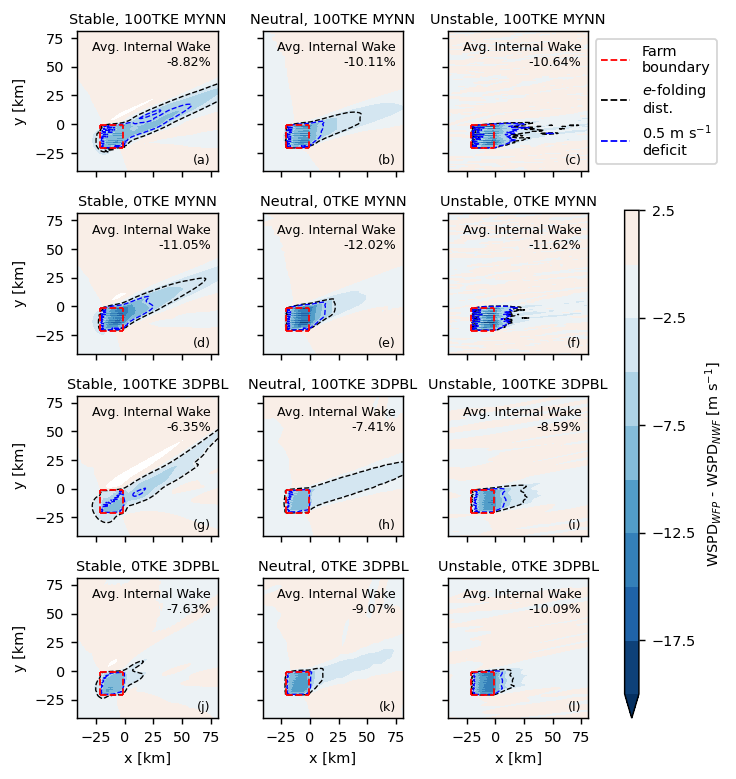

In [9]:
fig, ax = plt.subplots(4, 3, figsize=(5.5, 7), sharex=True, sharey=True, dpi=130)

for axs in ax.reshape(-1):
    axs.set_box_aspect(1)
    axs.tick_params(labelsize=8)

    axs.set_xticks([-25, 0, 25, 50, 75])
    axs.set_yticks([-25, 0, 25, 50, 75])
    
    axs.plot([-21, -21], [-21, -1], ls='--', color='r', lw=1, label='Farm\nboundary')
    axs.plot([-1, -1], [-21, -1], ls='--', color='r', lw=1)
    axs.plot([-21, -1], [-21, -21], ls='--', color='r', lw=1)
    axs.plot([-21, -1], [-1, -1], ls='--', color='r', lw=1)
    
ax[0,0].set_xlim(-41,81)
ax[0,0].set_ylim(-41,81)

# ax[0,0].set_xlim(-25,5)
# ax[0,0].set_ylim(-25,5)
    
## Plot parameters
ticks_right = np.arange(-20, 5, 2.5)
k_ind = 21

## Select simulation case
for pbl, tke, i in zip(['MYNN', 'MYNN', '3DPBL', '3DPBL'], ['100TKE', '0TKE', '100TKE', '0TKE'], range(4)):

    if pbl == 'MYNN':
        if tke == '100TKE':
            dsn_s = dsn_m_s
            dst_s = dst_m_s
            dsn_n = dsn_m_n
            dst_n = dst_m_n
            dsn_u = dsn_m_u
            dst_u = dst_m_u
        elif tke == '0TKE':
            dsn_s = dsn_m_s
            dst_s = dsz_m_s
            dsn_n = dsn_m_n
            dst_n = dsz_m_n
            dsn_u = dsn_m_u
            dst_u = dsz_m_u
    elif pbl == '3DPBL':
        if tke == '100TKE':
            dsn_s = dsn_hv_s
            dst_s = dst_hv_s
            dsn_n = dsn_hv_n
            dst_n = dst_hv_n
            dsn_u = dsn_hv_u
            dst_u = dst_hv_u
        elif tke == '0TKE':
            dsn_s = dsn_hv_s
            dst_s = dsz_hv_s
            dsn_n = dsn_hv_n
            dst_n = dsz_hv_n
            dsn_u = dsn_hv_u
            dst_u = dsz_hv_u

    ## Select wind speed slices
    wspd_nm_s = dsn_s['WSPD'].isel(bottom_top=k_ind)   # retroactive note: I shouldn't have included the "m" in the variable name
    wspd_tm_s = dst_s['WSPD'].isel(bottom_top=k_ind)
    wspd_nm_n = dsn_n['WSPD'].isel(bottom_top=k_ind)
    wspd_tm_n = dst_n['WSPD'].isel(bottom_top=k_ind)
    wspd_nm_u = dsn_u['WSPD'].isel(bottom_top=k_ind)
    wspd_tm_u = dst_u['WSPD'].isel(bottom_top=k_ind)
    
    ## Plot
    im1 = ax[i,0].contourf(iunstag_arr,
                            junstag_arr,
                            (wspd_tm_s-wspd_nm_s)/wspd_tm_s*100,
                            ticks_right,
                            cmap=plt.cm.RdBu_r, norm=TwoSlopeNorm(0, vmin=-1*np.abs(ticks_right).max(), vmax=np.abs(ticks_right).max()),
                            extend='min')
    im1 = ax[i,1].contourf(iunstag_arr,
                            junstag_arr,
                            (wspd_tm_n-wspd_nm_n)/wspd_tm_n*100,
                            ticks_right,
                            cmap=plt.cm.RdBu_r, norm=TwoSlopeNorm(0, vmin=-1*np.abs(ticks_right).max(), vmax=np.abs(ticks_right).max()),
                            extend='min')
    im1 = ax[i,2].contourf(iunstag_arr,
                            junstag_arr,
                            (wspd_tm_u-wspd_nm_u)/wspd_tm_u*100,
                            ticks_right,
                            cmap=plt.cm.RdBu_r, norm=TwoSlopeNorm(0, vmin=-1*np.abs(ticks_right).max(), vmax=np.abs(ticks_right).max()),
                            extend='min')

    ## Mark e-folding distance
    e_fold_s = (wspd_tm_s-wspd_nm_s).isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values/np.e
    e_fold_n = (wspd_tm_n-wspd_nm_n).isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values/np.e
    e_fold_u = (wspd_tm_u-wspd_nm_u).isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values/np.e

    ax[i,0].contour(iunstag_arr,
                       junstag_arr,
                       wspd_tm_s-wspd_nm_s,
                       [e_fold_s],
                       colors='k',
                       linewidths=0.75)
    ax[i,1].contour(iunstag_arr,
                       junstag_arr,
                       wspd_tm_n-wspd_nm_n,
                       [e_fold_n],
                       colors='k',
                       linewidths=0.75)
    ax[i,2].contour(iunstag_arr,
                       junstag_arr,
                       wspd_tm_u-wspd_nm_u,
                       [e_fold_u],
                       colors='k',
                       linewidths=0.75)
    ax[i,0].plot([-9999, -9999], [-10000, -9999], ls='--', lw=1, color='k', label='$e$-folding\ndist.')  ## For legend

#     ## Mark percentage decay contour
#     pct_contour = 5

#     ax[i,0].contour(iunstag_arr,
#                        junstag_arr,
#                        (wspd_tm_s-wspd_nm_s)/wspd_nm_s*100,
#                        [-1*pct_contour],
#                        colors='g',
#                        linewidths=0.75)
#     ax[i,1].contour(iunstag_arr,
#                        junstag_arr,
#                        (wspd_tm_n-wspd_nm_n)/wspd_nm_s*100,
#                        [-1*pct_contour],
#                        colors='g',
#                        linewidths=0.75)
#     ax[i,2].contour(iunstag_arr,
#                        junstag_arr,
#                        (wspd_tm_u-wspd_nm_u)/wspd_nm_s*100,
#                        [-1*pct_contour],
#                        colors='g',
#                        linewidths=0.75)
#     ax[i,0].plot([-9999, -9999], [-10000, -9999], ls='--', lw=1, color='g', label=f'{pct_contour}% deficit')  ## For legend

    ## Mark 0.5 m/s deficit contour
    ax[i,0].contour(iunstag_arr,
                       junstag_arr,
                       wspd_tm_s-wspd_nm_s,
                       [-0.5],
                       colors='b',
                       linewidths=0.75)
    ax[i,1].contour(iunstag_arr,
                       junstag_arr,
                       wspd_tm_n-wspd_nm_n,
                       [-0.5],
                       colors='b',
                       linewidths=0.75)
    ax[i,2].contour(iunstag_arr,
                       junstag_arr,
                       wspd_tm_u-wspd_nm_u,
                       [-0.5],
                       colors='b',
                       linewidths=0.75)
    ax[i,0].plot([-9999, -9999], [-10000, -9999], ls='--', lw=1, color='b', label='0.5 m s$^{-1}$\ndeficit') ## For legend
    
    # Title
    ax[i,0].set_title(f"Stable, {tke} {pbl}", fontsize=8, pad=4)
    ax[i,1].set_title(f"Neutral, {tke} {pbl}", fontsize=8, pad=4)
    ax[i,2].set_title(f"Unstable, {tke} {pbl}", fontsize=8, pad=4)
    
    ## Average internal wake
    avg_wake_int_s = (wspd_tm_s-wspd_nm_s).isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values \
                        / wspd_nm_s.isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values*100
    avg_wake_int_n = (wspd_tm_n-wspd_nm_n).isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values \
                        / wspd_nm_n.isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values*100
    avg_wake_int_u = (wspd_tm_u-wspd_nm_u).isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values \
                        / wspd_nm_u.isel(south_north=slice(89,109), west_east=slice(89,109)).mean().values*100

    str_s = 'Avg. Internal Wake\n'+np.round(avg_wake_int_s,2).astype(str)+'%'
    str_n = 'Avg. Internal Wake\n'+np.round(avg_wake_int_n,2).astype(str)+'%'
    str_u = 'Avg. Internal Wake\n'+np.round(avg_wake_int_u,2).astype(str)+'%'

    for axs, label in zip(ax[i,:].flatten(), [str_s, str_n, str_u]):
        axs.text(0.95,
              0.75,
              label,
              fontsize=7,
              transform = axs.transAxes,
              horizontalalignment='right',
                color='black')

for i in range(4):
    ax[i,0].set_ylabel('y [km]', fontsize=8)
for i in range(3):
    ax[-1,i].set_xlabel('x [km]', fontsize=8)
    
## Colorbar
cax1 = fig.add_axes([ax[0,-1].get_position().x1+0.03,
                     ax[3,-1].get_position().y0,
                     0.02,
                     ax[1,-1].get_position().y1-ax[3,-1].get_position().y0])
cbar1 = fig.colorbar(im1, cax=cax1, ticks=ticks_right[1::2])
cbar1.set_label('WSPD$_{WFP}$ - WSPD$_{NWF}$ [m s$^{-1}$]', fontsize=8)
cbar1.ax.tick_params(labelsize=8)     

## Legend
handles, labels = ax[0,0].get_legend_handles_labels()
lgd = ax[0,-1].legend(handles, labels, bbox_to_anchor=(1.0, 0.0), loc='lower left', fontsize=8)

## Subpanel labels
for axs, letter in zip(ax.flatten(), list(string.ascii_lowercase)):
    axs.text(0.95,
          0.05,
          f'({letter})',
          fontsize=7,
          transform = axs.transAxes,
          horizontalalignment='right',
            color='black')
    
plt.subplots_adjust(wspace=0.01, hspace=0.3)
    
    
plt.show()

### Side view

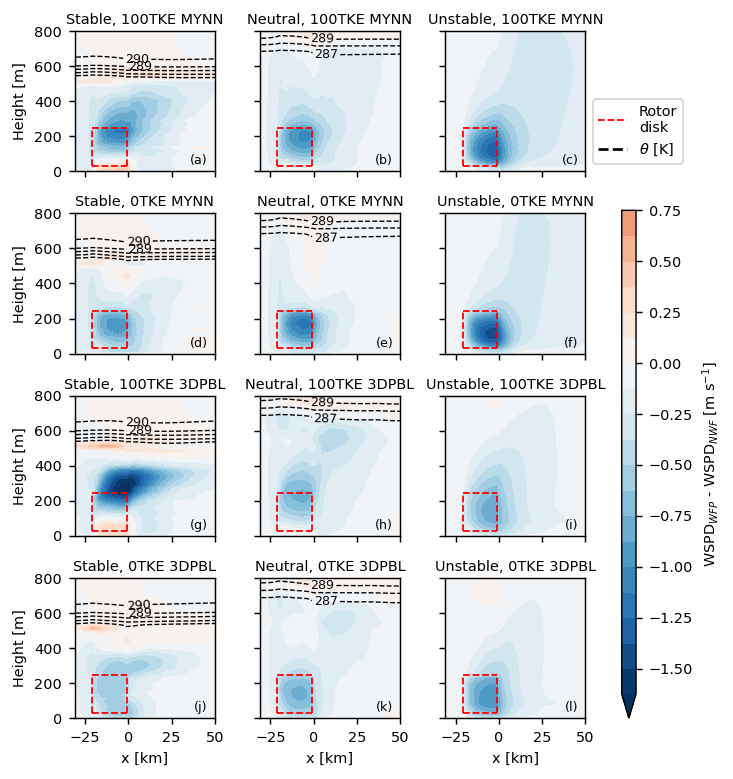

In [10]:
fig, ax = plt.subplots(4, 3, figsize=(5.5, 7), sharex=True, sharey=True, dpi=130)

j_ind_min = 89
j_ind_max = 109

for axs in ax.reshape(-1):
    axs.set_box_aspect(1)
    axs.tick_params(labelsize=8)

#     axs.set_xticks([-25, 0, 25, 50, 75])
    axs.set_xticks([-25, 0, 25, 50])
    
    axs.plot([-21, -21], [rotor_bot, rotor_top], ls='--', color='r', lw=1, label='Rotor\ndisk')
    axs.plot([-1, -1], [rotor_bot, rotor_top], ls='--', color='r', lw=1)
    axs.plot([-21, -1], [rotor_bot, rotor_bot], ls='--', color='r', lw=1)
    axs.plot([-21, -1], [rotor_top, rotor_top], ls='--', color='r', lw=1)
    
ax[0,0].set_xlim(-31,50)
ax[0,0].set_ylim(0,800)

for i in range(3):
    ax[-1,i].set_xlabel("x [km]", fontsize=8)
for i in range(4):
    ax[i,0].set_ylabel("Height [m]", fontsize=8)

## Plot parameters
ticks_right = np.arange(-1.625, 0.875, 0.125)
k_ind = 21

## Select simulation case
for pbl, tke, i in zip(['MYNN', 'MYNN', '3DPBL', '3DPBL'], ['100TKE', '0TKE', '100TKE', '0TKE'], range(4)):

    if pbl == 'MYNN':
        if tke == '100TKE':
            dsn_s = dsn_m_s
            dst_s = dst_m_s
            dsn_n = dsn_m_n
            dst_n = dst_m_n
            dsn_u = dsn_m_u
            dst_u = dst_m_u
        elif tke == '0TKE':
            dsn_s = dsn_m_s
            dst_s = dsz_m_s
            dsn_n = dsn_m_n
            dst_n = dsz_m_n
            dsn_u = dsn_m_u
            dst_u = dsz_m_u
    elif pbl == '3DPBL':
        if tke == '100TKE':
            dsn_s = dsn_hv_s
            dst_s = dst_hv_s
            dsn_n = dsn_hv_n
            dst_n = dst_hv_n
            dsn_u = dsn_hv_u
            dst_u = dst_hv_u
        elif tke == '0TKE':
            dsn_s = dsn_hv_s
            dst_s = dsz_hv_s
            dsn_n = dsn_hv_n
            dst_n = dsz_hv_n
            dsn_u = dsn_hv_u
            dst_u = dsz_hv_u

    ## Select wind speed slices
    wspd_n_s = dsn_s['WSPD'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')
    wspd_t_s = dst_s['WSPD'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')
    wspd_n_n = dsn_n['WSPD'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')
    wspd_t_n = dst_n['WSPD'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')
    wspd_n_u = dsn_u['WSPD'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')
    wspd_t_u = dst_u['WSPD'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')

    im1 = ax[i,0].contourf(iunstag_arr,
                            heights,
                            wspd_t_s-wspd_n_s,
                            ticks_right,
                            cmap=plt.cm.RdBu_r, norm=TwoSlopeNorm(0, vmin=-1*np.abs(ticks_right).max(), vmax=np.abs(ticks_right).max()),
                            extend='min')
    im1 = ax[i,1].contourf(iunstag_arr,
                            heights,
                            wspd_t_n-wspd_n_n,
                            ticks_right,
                            cmap=plt.cm.RdBu_r, norm=TwoSlopeNorm(0, vmin=-1*np.abs(ticks_right).max(), vmax=np.abs(ticks_right).max()),
                            extend='min')
    im1 = ax[i,2].contourf(iunstag_arr,
                            heights,
                            wspd_t_u-wspd_n_u,
                            ticks_right,
                            cmap=plt.cm.RdBu_r, norm=TwoSlopeNorm(0, vmin=-1*np.abs(ticks_right).max(), vmax=np.abs(ticks_right).max()),
                            extend='min')
    
    ## Temperature
    t_t_s = dst_s['T'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')
    t_t_n = dst_n['T'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')

    # Stable
    CS = ax[i,0].contour(iunstag_arr,
                       heights,
                       t_t_s,
                       ticks_t_s,
                       colors='k',
                       linestyles='dashed',
                       linewidths=0.75)
    manual_locations = [(7.0, 600), (5.0, 750)]
    ax[i,0].clabel(CS, inline=True, manual=manual_locations, fmt='%3.0f', fontsize=7)
    ax[i,0].plot([-9999, -9999], [0, 1], ls='--', color='k', label='$\\theta$ [K]')

    # Neutral
    CS = ax[i,1].contour(iunstag_arr,
                       heights,
                       t_t_n,
                       ticks_t_n,
                       colors='k',
                       linestyles='dashed',
                       linewidths=0.75)
    manual_locations = [(7.0, 600), (5.0, 750)]
    ax[i,1].clabel(CS, inline=True, manual=manual_locations, fmt='%3.0f', fontsize=7)
    
    # Title
    ax[i,0].set_title(f"Stable, {tke} {pbl}", fontsize=8, pad=4)
    ax[i,1].set_title(f"Neutral, {tke} {pbl}", fontsize=8, pad=4)
    ax[i,2].set_title(f"Unstable, {tke} {pbl}", fontsize=8, pad=4)

    
## Colorbar
cax1 = fig.add_axes([ax[0,-1].get_position().x1+0.03,
                     ax[3,-1].get_position().y0,
                     0.02,
                     ax[1,-1].get_position().y1-ax[3,-1].get_position().y0])
cbar1 = fig.colorbar(im1, cax=cax1, ticks=ticks_right[1::2])
cbar1.set_label('WSPD$_{WFP}$ - WSPD$_{NWF}$ [m s$^{-1}$]', fontsize=8)
cbar1.ax.tick_params(labelsize=8)     

## Legend
handles, labels = ax[0,0].get_legend_handles_labels()
lgd = ax[0,-1].legend(handles, labels, bbox_to_anchor=(1.0, 0.0), loc='lower left', fontsize=8)

## Subpanel labels
for axs, letter in zip(ax.flatten(), list(string.ascii_lowercase)):
    axs.text(0.95,
          0.05,
          f'({letter})',
          fontsize=7,
          transform = axs.transAxes,
          horizontalalignment='right',
            color='black')
    
plt.subplots_adjust(wspace=0.01, hspace=0.3)

# plt.savefig(f'../figs/all_wspd_side.pdf', bbox_inches='tight')

plt.show()

# TKE

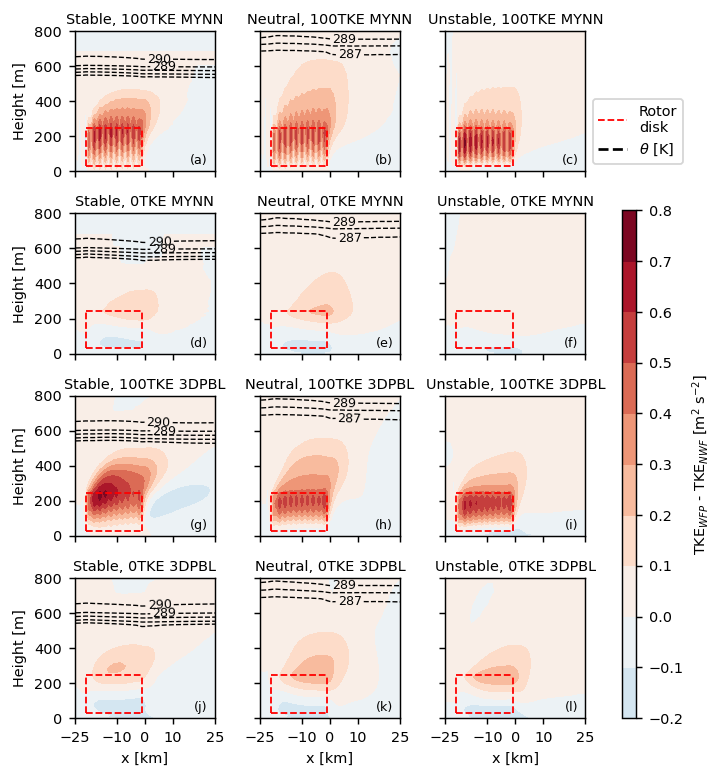

In [11]:
fig, ax = plt.subplots(4, 3, figsize=(5.5, 7), sharex=True, sharey=True, dpi=130)

for axs in ax.reshape(-1):
    axs.set_box_aspect(1)
    axs.tick_params(labelsize=8)

#     axs.set_xticks([-25, 0, 25, 50, 75])
    axs.set_xticks([-25, -10, 0, 10, 25])
    
    axs.plot([-21, -21], [rotor_bot, rotor_top], ls='--', color='r', lw=1, label='Rotor\ndisk')
    axs.plot([-1, -1], [rotor_bot, rotor_top], ls='--', color='r', lw=1)
    axs.plot([-21, -1], [rotor_bot, rotor_bot], ls='--', color='r', lw=1)
    axs.plot([-21, -1], [rotor_top, rotor_top], ls='--', color='r', lw=1)
    
ax[0,0].set_xlim(-25, 25)
ax[0,0].set_ylim(0,800)

for i in range(3):
    ax[-1,i].set_xlabel("x [km]", fontsize=8)
for i in range(4):
    ax[i,0].set_ylabel("Height [m]", fontsize=8)
    
ticks_right = np.arange(-0.2, 0.9, 0.1)
    
    
## Select simulation case
for pbl, tke, i in zip(['MYNN', 'MYNN', '3DPBL', '3DPBL'], ['100TKE', '0TKE', '100TKE', '0TKE'], range(4)):

    if pbl == 'MYNN':
        vert = heights
        if tke == '100TKE':
            dsn_s = dsn_m_s
            dst_s = dst_m_s
            dsn_n = dsn_m_n
            dst_n = dst_m_n
            dsn_u = dsn_m_u
            dst_u = dst_m_u
        elif tke == '0TKE':
            dsn_s = dsn_m_s
            dst_s = dsz_m_s
            dsn_n = dsn_m_n
            dst_n = dsz_m_n
            dsn_u = dsn_m_u
            dst_u = dsz_m_u
    elif pbl == '3DPBL':
        vert = heights_stag
        if tke == '100TKE':
            dsn_s = dsn_hv_s
            dst_s = dst_hv_s
            dsn_n = dsn_hv_n
            dst_n = dst_hv_n
            dsn_u = dsn_hv_u
            dst_u = dst_hv_u
        elif tke == '0TKE':
            dsn_s = dsn_hv_s
            dst_s = dsz_hv_s
            dsn_n = dsn_hv_n
            dst_n = dsz_hv_n
            dsn_u = dsn_hv_u
            dst_u = dsz_hv_u

    ## Select TKE slices
    tke_n_s = dsn_s['TKE'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')
    tke_t_s = dst_s['TKE'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')
    tke_n_n = dsn_n['TKE'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')
    tke_t_n = dst_n['TKE'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')
    tke_n_u = dsn_u['TKE'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')
    tke_t_u = dst_u['TKE'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')
    
    
    im1 = ax[i,0].contourf(iunstag_arr,
                            vert,
                            tke_t_s-tke_n_s,
                            ticks_right,
                            cmap=plt.cm.RdBu_r, norm=TwoSlopeNorm(0, vmin=-1*np.abs(ticks_right).max(), vmax=np.abs(ticks_right).max()),
                            extend='neither')
    im1 = ax[i,1].contourf(iunstag_arr,
                            vert,
                            tke_t_n-tke_n_n,
                            ticks_right,
                            cmap=plt.cm.RdBu_r, norm=TwoSlopeNorm(0, vmin=-1*np.abs(ticks_right).max(), vmax=np.abs(ticks_right).max()),
                            extend='neither')
    im1 = ax[i,2].contourf(iunstag_arr,
                            vert,
                            tke_t_u-tke_n_u,
                            ticks_right,
                            cmap=plt.cm.RdBu_r, norm=TwoSlopeNorm(0, vmin=-1*np.abs(ticks_right).max(), vmax=np.abs(ticks_right).max()),
                            extend='neither')
    
    ## Temperature
    t_t_s = dst_s['T'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')
    t_t_n = dst_n['T'].isel(south_north=slice(j_ind_min,j_ind_max)).mean('south_north')

    # Stable
    CS = ax[i,0].contour(iunstag_arr,
                       heights,
                       t_t_s,
                       ticks_t_s,
                       colors='k',
                       linestyles='dashed',
                       linewidths=0.75)
    manual_locations = [(7.0, 600), (5.0, 750)]
    ax[i,0].clabel(CS, inline=True, manual=manual_locations, fmt='%3.0f', fontsize=7)
    ax[i,0].plot([-9999, -9999], [0, 1], ls='--', color='k', label='$\\theta$ [K]')

    # Neutral
    CS = ax[i,1].contour(iunstag_arr,
                       heights,
                       t_t_n,
                       ticks_t_n,
                       colors='k',
                       linestyles='dashed',
                       linewidths=0.75)
    manual_locations = [(7.0, 600), (5.0, 750)]
    ax[i,1].clabel(CS, inline=True, manual=manual_locations, fmt='%3.0f', fontsize=7)
    
    # Title
    ax[i,0].set_title(f"Stable, {tke} {pbl}", fontsize=8, pad=4)
    ax[i,1].set_title(f"Neutral, {tke} {pbl}", fontsize=8, pad=4)
    ax[i,2].set_title(f"Unstable, {tke} {pbl}", fontsize=8, pad=4)
    
    
## Colorbar
cax1 = fig.add_axes([ax[0,-1].get_position().x1+0.03,
                     ax[3,-1].get_position().y0,
                     0.02,
                     ax[1,-1].get_position().y1-ax[3,-1].get_position().y0])
cbar1 = fig.colorbar(im1, cax=cax1, ticks=ticks_right)
cbar1.set_label('TKE$_{WFP}$ - TKE$_{NWF}$ [m$^2$ s$^{-2}$]', fontsize=8)
cbar1.ax.tick_params(labelsize=8)     

## Legend
handles, labels = ax[0,0].get_legend_handles_labels()
lgd = ax[0,-1].legend(handles, labels, bbox_to_anchor=(1.0, 0.0), loc='lower left', fontsize=8)
    
## Subpanel labels
for axs, letter in zip(ax.flatten(), list(string.ascii_lowercase)):
    axs.text(0.95,
          0.05,
          f'({letter})',
          fontsize=7,
          transform = axs.transAxes,
          horizontalalignment='right',
            color='black')
    
plt.subplots_adjust(wspace=0.01, hspace=0.3)

# plt.savefig(f'../figs/all_tke.pdf', bbox_inches='tight')

plt.show()

### TKE Budget

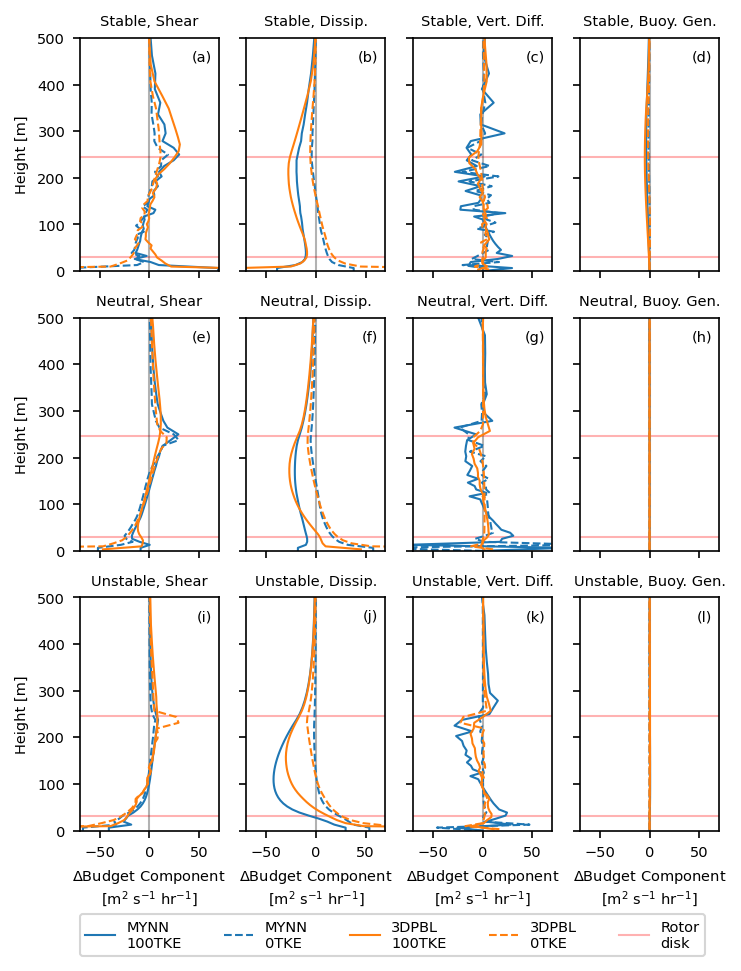

In [12]:
### Calculate TKE budget inside the farm
fig, ax = plt.subplots(3, 4, figsize=(5.5,7), sharex=True, sharey=True, dpi=150)

## Misc parameters
timestep = 3
qke2tke = 2
i_ind_min = 89
i_ind_max = 109
j_ind_min = 89
j_ind_max = 109

## Decorators for all subpanels
ax[0,0].set_xlim(-70, 70)
ax[0,0].set_ylim(0,500)
for axs in ax.reshape(-1):
    axs.tick_params(labelsize=7)

    axs.set_xticks([-50, 0, 50])
#     axs.set_yticks([-50, 0, 50])
    
    axs.axhline(rotor_top, ls='-', color='r', lw=1, alpha=0.3, label='Rotor\ndisk')
    axs.axhline(rotor_bot, ls='-', color='r', lw=1, alpha=0.3)
    axs.axvline(0, ls='-', color='k', lw='1', alpha=0.3)

## Plot data
for stability, i in zip(['Stable', 'Neutral', 'Unstable'], range(3)):
    ## Select datasets
    if stability == 'Stable':
        dsn_m = dsn_m_s
        dst_m = dst_m_s
        dsz_m = dsz_m_s
        dsn_hv = dsn_hv_s
        dst_hv = dst_hv_s
        dsz_hv = dsz_hv_s
    elif stability == 'Neutral':
        dsn_m = dsn_m_n
        dst_m = dst_m_n
        dsz_m = dsz_m_n
        dsn_hv = dsn_hv_n
        dst_hv = dst_hv_n
        dsz_hv = dsz_hv_n
    elif stability == 'Unstable':
        dsn_m = dsn_m_u
        dst_m = dst_m_u
        dsz_m = dsz_m_u
        dsn_hv = dsn_hv_u
        dst_hv = dst_hv_u
        dsz_hv = dsz_hv_u
    
    ## Calculate profiles
    # NWF
    shear_nm = dsn_m['TKE_SHEAR'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 # m2/s/hr
    vert_nm = dsn_m['TKE_VERT'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 # m2/s/hr
    buoy_nm = dsn_m['TKE_BUOY'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 # m2/s/hr
    diss_nm = dsn_m['TKE_DISS'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 # m2/s/hr

    shear_nhv = dsn_hv['TKE_SHEAR'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 *timestep/qke2tke # m2/s/hr
    vert_nhv = dsn_hv['TKE_VERT'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 *timestep/qke2tke # m2/s/hr
    buoy_nhv = dsn_hv['TKE_BUOY'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 *timestep/qke2tke # m2/s/hr
    diss_nhv = dsn_hv['TKE_DISS'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 *timestep/qke2tke # m2/s/hr

    # 100TKE
    shear_tm = dst_m['TKE_SHEAR'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 # m2/s/hr
    vert_tm = dst_m['TKE_VERT'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 # m2/s/hr
    buoy_tm = dst_m['TKE_BUOY'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 # m2/s/hr
    diss_tm = dst_m['TKE_DISS'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 # m2/s/hr

    shear_thv = dst_hv['TKE_SHEAR'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 *timestep/qke2tke # m2/s/hr
    vert_thv = dst_hv['TKE_VERT'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 *timestep/qke2tke # m2/s/hr
    buoy_thv = dst_hv['TKE_BUOY'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 *timestep/qke2tke # m2/s/hr
    diss_thv = dst_hv['TKE_DISS'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 *timestep/qke2tke # m2/s/hr
    
    # 0TKE
    shear_zm = dsz_m['TKE_SHEAR'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 # m2/s/hr
    vert_zm = dsz_m['TKE_VERT'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 # m2/s/hr
    buoy_zm = dsz_m['TKE_BUOY'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 # m2/s/hr
    diss_zm = dsz_m['TKE_DISS'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 # m2/s/hr

    shear_zhv = dsz_hv['TKE_SHEAR'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 *timestep/qke2tke # m2/s/hr
    vert_zhv = dsz_hv['TKE_VERT'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 *timestep/qke2tke # m2/s/hr
    buoy_zhv = dsz_hv['TKE_BUOY'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 *timestep/qke2tke # m2/s/hr
    diss_zhv = dsz_hv['TKE_DISS'].isel(south_north=slice(j_ind_min,j_ind_max), west_east=slice(i_ind_min,i_ind_max)).mean(('south_north', 'west_east')) * 3600 *timestep/qke2tke # m2/s/hr

    ## Plot profiles
    ax[i,0].plot(shear_tm-shear_nm, heights_stag, label='MYNN 100TKE', color='C0', ls='-', lw=1)
    ax[i,0].plot(shear_zm-shear_nm, heights_stag, label='MYNN 0TKE', color='C0', ls='--', lw=1)
    ax[i,0].plot(shear_thv-shear_nhv, heights, label='3DPBL 100TKE', color='C1', ls='-', lw=1)
    ax[i,0].plot(shear_zhv-shear_nhv, heights, label='3DPBL 0TKE', color='C1', ls='--', lw=1)
    
    ax[i,1].plot(-1*(diss_tm-diss_nm), heights_stag, label='MYNN 100TKE', color='C0', ls='-', lw=1)
    ax[i,1].plot(-1*(diss_zm-diss_nm), heights_stag, label='MYNN 0TKE', color='C0', ls='--', lw=1)
    ax[i,1].plot(-1*(diss_thv-diss_nhv), heights, label='3DPBL 100TKE', color='C1', ls='-', lw=1)
    ax[i,1].plot(-1*(diss_zhv-diss_nhv), heights, label='3DPBL 0TKE', color='C1', ls='--', lw=1)
    
    ax[i,2].plot(vert_tm-vert_nm, heights_stag, label='MYNN 100TKE', color='C0', ls='-', lw=1)
    ax[i,2].plot(vert_zm-vert_nm, heights_stag, label='MYNN 0TKE', color='C0', ls='--', lw=1)
    ax[i,2].plot(vert_thv-vert_nhv, heights, label='3DPBL 100TKE', color='C1', ls='-', lw=1)
    ax[i,2].plot(vert_zhv-vert_nhv, heights, label='3DPBL 0TKE', color='C1', ls='--', lw=1)
    
    ax[i,3].plot(buoy_tm-buoy_nm, heights_stag, label='MYNN 100TKE', color='C0', ls='-', lw=1)
    ax[i,3].plot(buoy_zm-buoy_nm, heights_stag, label='MYNN 0TKE', color='C0', ls='--', lw=1)
    ax[i,3].plot(buoy_thv-buoy_nhv, heights, label='3DPBL 100TKE', color='C1', ls='-', lw=1)
    ax[i,3].plot(buoy_zhv-buoy_nhv, heights, label='3DPBL 0TKE', color='C1', ls='--', lw=1)
    
    ## Decorators
    ax[i,0].set_title(f"{stability}, Shear", fontsize=7)
    ax[i,1].set_title(f"{stability}, Dissip.", fontsize=7)
    ax[i,2].set_title(f"{stability}, Vert. Diff.", fontsize=7)
    ax[i,3].set_title(f"{stability}, Buoy. Gen.", fontsize=7)
    
for i in range(3):
    ax[i,0].set_ylabel('Height [m]', fontsize=7)
for i in range(4):
    ax[-1,i].set_xlabel("$\Delta$Budget Component\n[m$^2$ s$^{-1}$ hr$^{-1}$]", fontsize=7)
    
## Legend
handles, labels = ax[-1,0].get_legend_handles_labels()
handles_rearranged = [handles[1], handles[2], handles[3], handles[4], handles[0]]
labels_rearranged = ['MYNN\n100TKE', 'MYNN\n0TKE', '3DPBL\n100TKE', '3DPBL\n0TKE', 'Rotor\ndisk']
lgd = ax[-1,0].legend(handles_rearranged, labels_rearranged, bbox_to_anchor=(0, -0.46, 4.5, .102), loc='upper left', fontsize=7, ncol=5, mode='expand',borderaxespad=0.)
    
## Subpanel labels
for axs, letter in zip(ax.flatten(), list(string.ascii_lowercase)):
    axs.text(0.95,
          0.90,
          f'({letter})',
          fontsize=7,
          transform = axs.transAxes,
          horizontalalignment='right',
            color='black')
    
# plt.savefig(f'../figs/all_tke_budget.pdf', bbox_inches='tight')
    
plt.show()

# Power

In [13]:
### Create custom colorbars
def calc_viridis_colorbar(cm_min, cm_max, cm_interval):
    '''
    Calculate tick bounds, a discrete colormap, and a norm for use with pcolormesh plots
    '''
    custom_bounds = np.arange(cm_min, cm_max+cm_interval, cm_interval) 

    all_colors = plt.cm.viridis(np.linspace(0, 1, int((cm_max-cm_min)/cm_interval)))

    custom_cmap = LinearSegmentedColormap.from_list('custom_map',
        all_colors)
    custom_cmap.set_over('magenta')
    custom_cmap.set_under('magenta')
    custom_cmap.set_bad('magenta')

    custom_norm = BoundaryNorm(custom_bounds, custom_cmap.N)
    
    return custom_bounds, custom_cmap, custom_norm

In [14]:
### Create custom colorbars
def calc_cividis_colorbar(cm_min, cm_max, cm_interval):
    '''
    Calculate tick bounds, a discrete colormap, and a norm for use with pcolormesh plots
    '''
    custom_bounds = np.arange(cm_min, cm_max+cm_interval, cm_interval) 

    all_colors = plt.cm.cividis(np.linspace(0, 1, int((cm_max-cm_min)/cm_interval)))

    custom_cmap = LinearSegmentedColormap.from_list('custom_map',
        all_colors)
    custom_cmap.set_over('magenta')
    custom_cmap.set_under('magenta')
    custom_cmap.set_bad('magenta')

    custom_norm = BoundaryNorm(custom_bounds, custom_cmap.N)
    
    return custom_bounds, custom_cmap, custom_norm

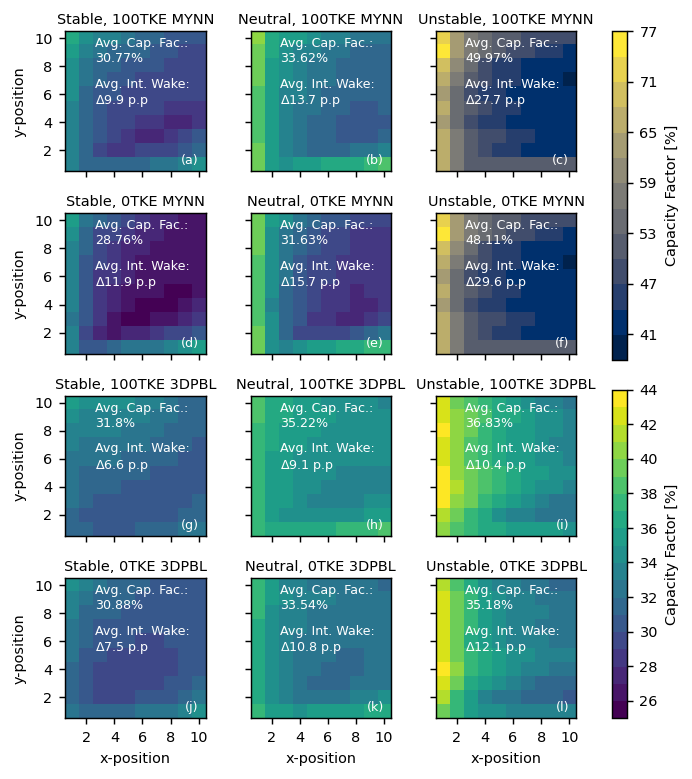

In [15]:
fig, ax = plt.subplots(4, 3, figsize=(5.5, 7), sharex=True, sharey=True, dpi=130)

for axs in ax.reshape(-1):
    axs.set_box_aspect(1)
    axs.tick_params(labelsize=8)
    
    axs.set_xticks([1, 3, 5, 7, 9])
    axs.set_xticklabels([2, 4, 6, 8, 10])
    axs.set_yticks([1, 3, 5, 7, 9])
    axs.set_yticklabels([2, 4, 6, 8, 10])
    
for i in range(3):
    ax[-1,i].set_xlabel("x-position", fontsize=8)
for i in range(4):
    ax[i,0].set_ylabel("y-position", fontsize=8)
    
## Plot parameters
j_ind_min = 89
j_ind_max = 109

cm_min1 = 38
cm_max1 = 75
cm_interval1 = 3
cm_min2 = 25
cm_max2 = 44
cm_interval2 = 1
ticks1, custom_cmap1, custom_norm1 = calc_cividis_colorbar(cm_min1, cm_max1, cm_interval1)
ticks2, custom_cmap2, custom_norm2 = calc_viridis_colorbar(cm_min2, cm_max2, cm_interval2)
    
## Select simulation case
for pbl, tke, i in zip(['MYNN', 'MYNN', '3DPBL', '3DPBL'], ['100TKE', '0TKE', '100TKE', '0TKE'], range(4)):

    if pbl == 'MYNN':
        if tke == '100TKE':
            dsn_s = dsn_m_s
            dst_s = dst_m_s
            dsn_n = dsn_m_n
            dst_n = dst_m_n
            dsn_u = dsn_m_u
            dst_u = dst_m_u
        elif tke == '0TKE':
            dsn_s = dsn_m_s
            dst_s = dsz_m_s
            dsn_n = dsn_m_n
            dst_n = dsz_m_n
            dsn_u = dsn_m_u
            dst_u = dsz_m_u
    elif pbl == '3DPBL':
        if tke == '100TKE':
            dsn_s = dsn_hv_s
            dst_s = dst_hv_s
            dsn_n = dsn_hv_n
            dst_n = dst_hv_n
            dsn_u = dsn_hv_u
            dst_u = dst_hv_u
        elif tke == '0TKE':
            dsn_s = dsn_hv_s
            dst_s = dsz_hv_s
            dsn_n = dsn_hv_n
            dst_n = dsz_hv_n
            dsn_u = dsn_hv_u
            dst_u = dsz_hv_u

    ## Select power
    power_t_s = dst_s['POWER'].isel(south_north=slice(j_ind_min, j_ind_max, 2), west_east=slice(j_ind_min, j_ind_max, 2))/1e6/12*100
    power_t_n = dst_n['POWER'].isel(south_north=slice(j_ind_min, j_ind_max, 2), west_east=slice(j_ind_min, j_ind_max, 2))/1e6/12*100
    power_t_u = dst_u['POWER'].isel(south_north=slice(j_ind_min, j_ind_max, 2), west_east=slice(j_ind_min, j_ind_max, 2))/1e6/12*100
    
    im1 = ax[i,0].imshow(power_t_s,
                            origin='lower',
                            cmap=custom_cmap2,
                            norm=custom_norm2)
    im1 = ax[i,1].imshow(power_t_n,
                            origin='lower',
                            cmap=custom_cmap2,
                            norm=custom_norm2)
    im1 = ax[i,2].imshow(power_t_u,
                            origin='lower',
                            cmap=custom_cmap2,
                            norm=custom_norm2)
    
    ## Average capacity factor
    str_ts1 = 'Avg. Cap. Fac.:\n'+np.round(power_t_s.mean().values,2).astype(str)+'%'
    str_tn1 = 'Avg. Cap. Fac.:\n'+np.round(power_t_n.mean().values,2).astype(str)+'%'
    str_tu1 = 'Avg. Cap. Fac.:\n'+np.round(power_t_u.mean().values,2).astype(str)+'%'
    
    for axs, label in zip(ax[i,:].flatten(), [str_ts1, str_tn1, str_tu1]):
        axs.text(0.21,
              0.78,
              label,
              fontsize=7,
              transform = axs.transAxes,
              horizontalalignment='left',
                color='white')
        
    ## Average internal wakes
    wspd_n_prof_s = dsn_s['WSPD'].isel(south_north=slice(89,109), west_east=slice(89,109)).mean(('south_north', 'west_east'))
    wspd_n_prof_n = dsn_n['WSPD'].isel(south_north=slice(89,109), west_east=slice(89,109)).mean(('south_north', 'west_east'))
    wspd_n_prof_u = dsn_u['WSPD'].isel(south_north=slice(89,109), west_east=slice(89,109)).mean(('south_north', 'west_east'))
    
    wspd_n_hh_s = np.interp(hubheight, heights, wspd_n_prof_s.values)
    wspd_n_hh_n = np.interp(hubheight, heights, wspd_n_prof_n.values)
    wspd_n_hh_u = np.interp(hubheight, heights, wspd_n_prof_u.values)
    
    int_wake_s = np.interp(wspd_n_hh_s, property_df.index, property_df.Power)/12000*100-power_t_s.mean().values
    int_wake_n = np.interp(wspd_n_hh_n, property_df.index, property_df.Power)/12000*100-power_t_n.mean().values
    int_wake_u = np.interp(wspd_n_hh_u, property_df.index, property_df.Power)/12000*100-power_t_u.mean().values
    
    str_ts2 = f'Avg. Int. Wake:\n$\Delta${int_wake_s:.1f} p.p'
    str_tn2 = f'Avg. Int. Wake:\n$\Delta${int_wake_n:.1f} p.p'
    str_tu2 = f'Avg. Int. Wake:\n$\Delta${int_wake_u:.1f} p.p'
    
    for axs, label in zip(ax[i,:].flatten(), [str_ts2, str_tn2, str_tu2]):
        axs.text(0.21,
              0.48,
              label,
              fontsize=7,
              transform = axs.transAxes,
              horizontalalignment='left',
                color='white')
    
    # Title
    ax[i,0].set_title(f"Stable, {tke} {pbl}", fontsize=8, pad=4)
    ax[i,1].set_title(f"Neutral, {tke} {pbl}", fontsize=8, pad=4)
    ax[i,2].set_title(f"Unstable, {tke} {pbl}", fontsize=8, pad=4)
    
## Manually override unstable MYNN
dst_u1 = dst_m_u
dst_u2 = dsz_m_u

power_t_u1 = dst_u1['POWER'].isel(south_north=slice(j_ind_min, j_ind_max, 2), west_east=slice(j_ind_min, j_ind_max, 2))/1e6/12*100
power_t_u2 = dst_u1['POWER'].isel(south_north=slice(j_ind_min, j_ind_max, 2), west_east=slice(j_ind_min, j_ind_max, 2))/1e6/12*100

im2 = ax[0,2].imshow(power_t_u1,
                        origin='lower',
                        cmap=custom_cmap1,
                        norm=custom_norm1)  
im2 = ax[1,2].imshow(power_t_u2,
                        origin='lower',
                        cmap=custom_cmap1,
                        norm=custom_norm1)  

## Colorbar
cax1 = fig.add_axes([ax[0,-1].get_position().x1+0.03,
                     ax[3,-1].get_position().y0,
                     0.02,
                     ax[1,-1].get_position().y1-ax[2,-1].get_position().y0])
cbar1 = fig.colorbar(im1, cax=cax1, ticks=ticks2[1::2])
cbar1.set_label('Capacity Factor [%]', fontsize=8)
cbar1.ax.tick_params(labelsize=8)   

cax2 = fig.add_axes([ax[0,-1].get_position().x1+0.03,
                     ax[1,-1].get_position().y0,
                     0.02,
                     ax[1,-1].get_position().y1-ax[2,-1].get_position().y0])
cbar2 = fig.colorbar(im2, cax=cax2, ticks=ticks1[1::2])
cbar2.set_label('Capacity Factor [%]', fontsize=8)
cbar2.ax.tick_params(labelsize=8)   


## Subpanel labels
for axs, letter in zip(ax.flatten(), list(string.ascii_lowercase)):
    axs.text(0.95,
          0.05,
          f'({letter})',
          fontsize=7,
          transform = axs.transAxes,
          horizontalalignment='right',
            color='white')
    
plt.subplots_adjust(wspace=0.01, hspace=0.3)

# plt.savefig(f'../figs/all_power.pdf', bbox_inches='tight')
    
plt.show()